<a href="https://colab.research.google.com/github/hhchin1995/water-quality-clustering/blob/main/Overall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overall water samples (Coastal, Wetland, and groundwater) clustering and classification

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

!pip install bioinfokit
import bioinfokit

     |████████████████████████████████| 84 kB 2.1 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-py3-none-any.whl size=56749 sha256=3938d453043806d25492cd4d95b8ff832395d7e3004cced86c740662fdd7520b
  Stored in directory: /root/.cache/pip/wheels/0d/b0/a4/2be59655e33c889f2197d43e99ed077f05a6559e24ce28e21a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=1ab40cc4f2e20d32396a57bc83fad5ff07a1003248ccea2a469282372a0005ad
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


## Importing the dataset

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

# dataset = pd.read_csv('PRES_plastic4-1.csv')
dataset = pd.read_csv('Overall_samples_2.csv')
# PET
# X = dataset.iloc[:-54, 2:4].values
# y = dataset.iloc[:-54, 5].values

# PE
# X = dataset.iloc[15:-20, 2:5].values
# X[:,1]=X[:,2]
# X=X[:,:-1]
# y = dataset.iloc[15:-20, 5].values



# PP
# X = dataset.iloc[50:, 2:5].values
# X[:,1]=X[:,2]
# X=np.delete(X,8,0)
# X=X[:,:-1]
# y = dataset.iloc[50:, 5].values
# y=np.delete(y,8,0)
X_c = dataset.iloc[0:300, 0:].values
X=X_c
columns=dataset.columns
print(columns)
Supply=dataset.iloc[300:303,0:].values
Demand=dataset.iloc[303:306,0:].values
Resources=dataset.iloc[306:310,0:].values

Resources[np.isnan(Resources)==1]=0

print(Supply)
print(Demand)
print(Resources)





Saving Overall_samples_2.csv to Overall_samples_2 (4).csv
Index(['DO', 'Conductivity', 'Nitrite', 'Nitrate', 'Phosphate', 'AN', 'BOD',
       'COD', 'SS', 'TDS', 'SO4', 'Na', 'TH', 'CL', 'Mg', 'Ca', 'HCO3', 'SAR',
       'K', 'Temperature', 'Salinity', 'pH', 'Alkalinity', 'NH4N', 'H2SiO3',
       'Cu', 'Zn', 'As', 'Cd', 'Pb', 'Hg', 'Cr', 'Oil'],
      dtype='object')
[[5.46287907e+00 1.77070232e+02 4.63016400e-03 3.56959500e-03
  5.58392260e-01 4.48022304e-01 4.11921010e+00 4.31499212e+01
  3.77387889e+01 1.90305917e+03 3.11980487e+02 1.78997491e+02
  1.01635286e+04 4.91059418e+02 7.03809241e+01 1.48788362e+02
  1.56285450e+02 1.31141082e+01 7.77544550e+00 3.44123576e+01
  1.85692803e+01 8.15407588e+00 1.53055038e+00 1.15471652e-01
  1.20733066e-01 2.54177052e+01 1.00415680e+02 5.16567717e+00
  7.02647023e-01 4.31032930e+00 5.67921410e-02 1.34457760e+00
  2.09764271e-01]
 [5.79649029e+00 9.83650585e+01 1.49016930e-02 2.57646280e-02
  3.15497312e-01 1.26079245e-01 1.78586953e+00 1.74940

## Feature Scaling

In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# sc.fit(X_c)
# X_c=sc.transform(X_c)
X_c=sc.fit_transform(X_c)
X=sc.transform(X)

Supply=sc.transform(Supply)
Demand=sc.transform(Demand)
Resources=sc.transform(Resources)

# X_test_sc=sc.transform(X_test)

# print(X_c)
# print(X_test_sc)

Custom Sampling (clean data)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# Scale Features
scaler = StandardScaler()
x_c_scaled = X_c


# Fit KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_c_scaled, y_train)
preds = pd.DataFrame(knn.predict_proba(x_c_scaled))

preds.columns = ['label_0', 'label_1','label_2','label_3','label_4']

# Bind defaulted label proba to train dataset
# print(preds.iloc[1,2])

y_prob=np.zeros((len(y_train),1))
for i in range(0,len(y_train)):
  y_prob[i]=preds.iloc[i,int(y_train[i])-1]

#print(y_prob)
# X_train['knn_minority_class_proba'] = preds['label_1']

x_c_filtered=np.zeros(X_c.shape)
y_train_filtered=np.zeros(X_c.shape[0])

for ii in range(0,len(y_train_filtered)):
  if y_prob[ii]>=0.5:
    x_c_filtered[ii,:] = X_c[ii,:]
    y_train_filtered[ii] = y_train[ii]

x_c_filtered=x_c_filtered[np.all(x_c_filtered != 0, axis=1), :]
y_train_filtered=y_train_filtered[y_train_filtered >0]


# Oversample using SMOTE
sm = SMOTE(k_neighbors=1,random_state=40)
X_c, y_train = sm.fit_resample(x_c_filtered, y_train_filtered)

print(X_c)

Clustering

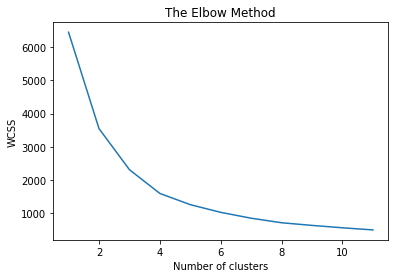

In [ ]:
# Using the elbow method to find the optimal number of clusters




#####X_c=X_train


#X_c = sc.fit_transform(X_c)




from sklearn.cluster import KMeans
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_c)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 12), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Applying PCA on data**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)    # Set to 7 for 90% variance
X_c= pca.fit_transform(X_c)
Supply=pca.transform(Supply)
Demand=pca.transform(Demand)
Resources=pca.transform(Resources)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

# # loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'],
# # #                                                    'PC7', 'PC8','PC9', 'PC10','PC11', 'PC12',
# # #                                                    'PC13', 'PC14'],
# #                          index=dataset.columns[2:])
# # print(loadings)

# Applying Kernel PCA
# from sklearn.decomposition import KernelPCA
# kpca = KernelPCA(n_components=17,kernel = 'rbf',remove_zero_eig=True)
# X_c = kpca.fit_transform(X_c)



# # Supply=kpca.transform(Supply)
# # Demand=kpca.transform(Demand)

# kpca_transform = kpca.transform(X)
# explained_variance = np.var(kpca_transform, axis=0)

# ev = explained_variance / np.sum(explained_variance)
# print(ev)
# for i in range(1,len(ev)):
#   ev[i]=ev[i]+ev[i-1]

# cum_ev=ev
# print(cum_ev)
# print(sum(ev))





[0.38323918 0.26854326]
0.6517824371396919


ValueError: ignored

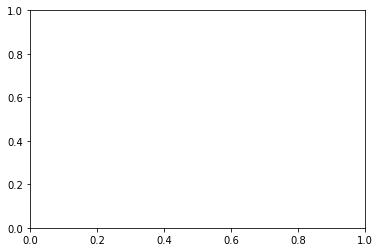

In [ ]:
# import math

# S=np.zeros((2,2))

# for i in range(0,2):
#   S[i,i]=math.sqrt(kpca.eigenvalues_[i]/(299))
# # lo
# G=np.matmul(kpca.eigenvectors_,S)
# print(S)
# print(G[10])
plt.bar([1,2,3,4],list(ev*100),label='Principal Components',color='b')
plt.legend()
plt.xlabel('Principal Components ')
n=list(ev*100)
pc=[]
for i in range(len(n)):
  n[i]=round(n[i],4)
  pc.append('PC-'+str(i+1)+'('+str(n[i])+')')
plt.xticks([1,2,3,4],pc, fontsize=7, rotation=30)
plt.ylabel('Variance Ratio')
plt.show()

print(kpca.eigenvalues_/299)

# Check=np.matmul(X,loadings)
# print(Check[0])
# print(X_c[0])
# print((Check-X_c)*100/X_c)

(300, 2)
0.40481994940990734
1.0221762832447783
244.15743323763408


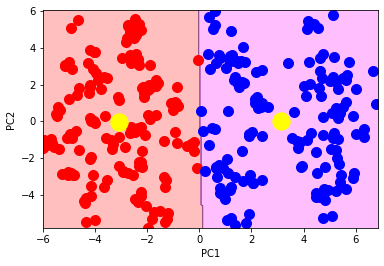

In [ ]:

# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_c)
Supply_kmeans=kmeans.predict(Supply)
Demand_kmeans=kmeans.predict(Demand)
Resources_kmeans=kmeans.predict(Resources)
#X_c = sc.inverse_transform(X_c)
# kmeans.cluster_centers_ = sc.inverse_transform(kmeans.cluster_centers_)

# Visualising the clusters

from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start = X_c[:, 0].min()-0.01, stop = X_c[:, 0].max()+0.1, step = 0.05),
                     np.arange(start = X_c[:, 1].min()-0.01, stop = X_c[:, 1].max()+0.1, step = 0.05))
plt.contourf(X1, X2, kmeans.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'blue','green','magenta')))

plt.scatter(X_c[y_kmeans == 0, 0], X_c[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_c[y_kmeans == 1, 0], X_c[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_c[y_kmeans == 2, 0], X_c[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_c[y_kmeans == 3, 0], X_c[y_kmeans == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
# plt.scatter(X_c[y_kmeans == 4, 0], X_c[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

# plt.scatter(Supply[Supply_kmeans == 0, 0], Supply[Supply_kmeans == 0, 1], s = 100, c = 'cyan', label = 'Source')
# plt.scatter(Supply[Supply_kmeans == 1, 0], Supply[Supply_kmeans == 1, 1], s = 100, c = 'cyan', label = 'Source')
# plt.scatter(Supply[Supply_kmeans == 2, 0], Supply[Supply_kmeans == 2, 1], s = 100, c = 'cyan', label = 'Source')
# plt.scatter(Supply[Supply_kmeans == 3, 0], Supply[Supply_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Source')
# plt.scatter(Demand[Demand_kmeans == 0, 0], Demand[Demand_kmeans == 0, 1], s = 100, c = 'brown', label = 'Demand')
# plt.scatter(Demand[Demand_kmeans == 1, 0], Demand[Demand_kmeans == 1, 1], s = 100, c = 'brown', label = 'Demand')
# plt.scatter(Demand[Demand_kmeans == 2, 0], Demand[Demand_kmeans == 2, 1], s = 100, c = 'brown', label = 'Demand')
# plt.scatter(Demand[Demand_kmeans == 3, 0], Demand[Demand_kmeans == 3, 1], s = 100, c = 'brown', label = 'Demand')
# plt.scatter(Resources[Resources_kmeans == 0, 0], Resources[Resources_kmeans == 0, 1], s = 100, c = 'black', label = 'Demand')
# plt.scatter(Resources[Resources_kmeans == 1, 0], Resources[Resources_kmeans == 1, 1], s = 100, c = 'black', label = 'Demand')
# plt.scatter(Resources[Resources_kmeans == 2, 0], Resources[Resources_kmeans == 2, 1], s = 100, c = 'black', label = 'Demand')
# plt.scatter(Resources[Resources_kmeans == 3, 0], Resources[Resources_kmeans == 3, 1], s = 100, c = 'black', label = 'Demand')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
# plt.title('Clusters of plastic waste')
plt.xlabel('PC1')
plt.ylabel('PC2 ')
# plt.legend()
# plt.show()


print(X_c.shape)
# Evaluation
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score

labels = kmeans.labels_
print(metrics.silhouette_score(X_c, labels, metric='euclidean'))
print(davies_bouldin_score(X_c, labels))
print(metrics.calinski_harabasz_score(X_c, labels))

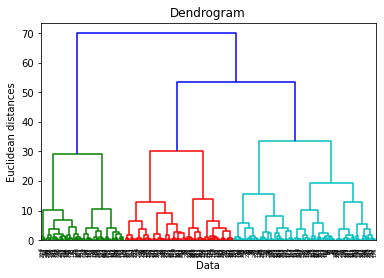

In [ ]:
import scipy.cluster.hierarchy as sch
#X_c = sc.fit_transform(X_c)

dendrogram = sch.dendrogram(sch.linkage(X_c, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters =4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_c)
#X_c = sc.inverse_transform(X_c)



# Evaluation
print(metrics.silhouette_score(X_c, y_hc, metric='euclidean'))
print(davies_bouldin_score(X_c, y_hc))
print(metrics.calinski_harabasz_score(X_c, y_hc))

0.3433036978624852
0.9602066496751015
218.43851129238485


In [ ]:
# Fit KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_c, y_hc)

y_supply=knn.predict(Supply)
y_demand=knn.predict(Demand)
y_resources=knn.predict(Resources)

preds_supply = pd.DataFrame(knn.predict_proba(Supply))

preds_demand = pd.DataFrame(knn.predict_proba(Demand))

preds_resources = pd.DataFrame(knn.predict_proba(Resources))

preds_supply.columns = ['label_0', 'label_1','label_2','label_3']
preds_demand.columns = ['label_0', 'label_1','label_2','label_3']
preds_resources.columns = ['label_0', 'label_1','label_2','label_3']

print(preds_supply)
print(preds_demand)
print(preds_resources)

   label_0  label_1  label_2  label_3
0      0.0      0.0      1.0      0.0
1      0.0      1.0      0.0      0.0
2      0.0      0.0      1.0      0.0
   label_0  label_1  label_2  label_3
0      1.0      0.0      0.0      0.0
1      1.0      0.0      0.0      0.0
2      0.0      0.0      1.0      0.0
   label_0  label_1  label_2  label_3
0      1.0      0.0      0.0      0.0
1      1.0      0.0      0.0      0.0
2      1.0      0.0      0.0      0.0
3      0.0      0.0      1.0      0.0


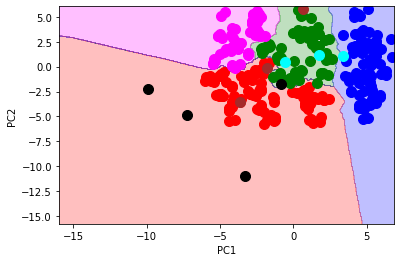

In [ ]:
# Visualising the clusters
# Fit KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_c, y_hc)

X1, X2 = np.meshgrid(np.arange(start = X_c[:, 0].min()-10, stop = X_c[:, 0].max()+0.1, step = 0.05),
                     np.arange(start = X_c[:, 1].min()-10, stop = X_c[:, 1].max()+0.1, step = 0.05))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'blue','green','magenta')))

plt.scatter(X_c[y_hc == 0, 0], X_c[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_c[y_hc == 1, 0], X_c[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_c[y_hc == 2, 0], X_c[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_c[y_hc == 3, 0], X_c[y_hc == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
# plt.scatter(X_c[y_hc == 4, 0], X_c[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(Supply[y_supply == 0, 0], Supply[y_supply == 0, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Supply[y_supply == 1, 0], Supply[y_supply == 1, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Supply[y_supply == 2, 0], Supply[y_supply == 2, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Supply[y_supply == 3, 0], Supply[y_supply == 3, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Demand[y_demand == 0, 0], Demand[y_demand == 0, 1], s = 100, c = 'brown', label = 'Source')
plt.scatter(Demand[y_demand == 1, 0], Demand[y_demand == 1, 1], s = 100, c = 'brown', label = 'Source')
plt.scatter(Demand[y_demand == 2, 0], Demand[y_demand== 2, 1], s = 100, c = 'brown', label = 'Demand')
plt.scatter(Demand[y_demand == 3, 0], Demand[y_demand== 3, 1], s = 100, c = 'brown', label = 'Demand')
plt.scatter(Resources[y_resources == 0, 0], Resources[y_resources == 0, 1], s = 100, c = 'black', label = 'Demand')
plt.scatter(Resources[y_resources == 1, 0], Resources[y_resources == 1, 1], s = 100, c = 'black', label = 'Demand')
plt.scatter(Resources[y_resources == 2, 0], Resources[y_resources == 2, 1], s = 100, c = 'black', label = 'Demand')
plt.scatter(Resources[y_resources == 3, 0], Resources[y_resources == 3, 1], s = 100, c = 'black', label = 'Demand')
# plt.title('Clusters of plastic waste')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.legend()
plt.show()

**DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
#X_c = sc.fit_transform(X_c)
db = DBSCAN(eps=0.17, min_samples=30).fit(X_c)
labels = db.labels_
print(labels)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_c, labels))

[ 0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0 -1  0  0  0  0  0  0  0]
Silhouette Coefficient: 0.387


In [ ]:
from sklearn.cluster import AffinityPropagation
# Compute Affinity Propagation
af = AffinityPropagation(preference=-0.795, random_state=30,affinity='euclidean').fit(X_c)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)
print(labels)

print("Estimated number of clusters: %d" % n_clusters_)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X_c, labels, metric="sqeuclidean")
)

[2 5 0 6 4 0 0 3 1 3 0 0 3 4 0 5 4 4 0 6 0 4 4 4 3 6 4 3 1 6 0 4 1 2 1 2 4
 6 4 5 6 3 0 4 4 5 0 4 4 6 5 4 3 6 6 1 0 2 2 1 5 4 5 4 6 3 4 2 3 5 2 3 0 4
 4 6 6 3 5 2 5 5 1 5 0 3 6 0 1 4 5 5 0 2 5 0 1 0 2 2 1 5 5 6 3 3 6 2 4 0 4
 5 4 5 0 3 5 3 5 5 6 6 4 3 1 5 4 0 6 6 6 5 6 4 6 5 3 0 2 4 5 6 6 0 4 6 6 0
 0 3 5 2 4 4 6 5 6 5 5 0 2 3 2 4 4 4 1 4 6 2 2 2 5 2 5 2 5 1 4 5 0 6 5 4 4
 1 5 6 0 6 0 3 4 0 2 6 5 6 2 4 5 1 3 5 4 2 4 3 1 0 1 1 0 5 2 6 5 1 6 0 4 2
 3 4 4 3 1 6 3 1 6 0 3 2 1 6 6 5 5 6 1 0 2 4 2 4 5 6 5 2 0 5 1 6 6 0 5 4 4
 6 1 5 5 6 4 6 6 4 6 3 0 4 6 2 6 6 6 2 1 6 2 2 0 2 6 0 6 6 1 2 2 1 3 0 5 2
 4 4 6 2]
Estimated number of clusters: 7
Silhouette Coefficient: 0.471


Decision Tree

|--- PC1 <= 0.05
|   |--- PC1 <= -2.88
|   |   |--- class: 1
|   |--- PC1 >  -2.88
|   |   |--- class: 0
|--- PC1 >  0.05
|   |--- PC1 <= 2.84
|   |   |--- class: 2
|   |--- PC1 >  2.84
|   |   |--- class: 3



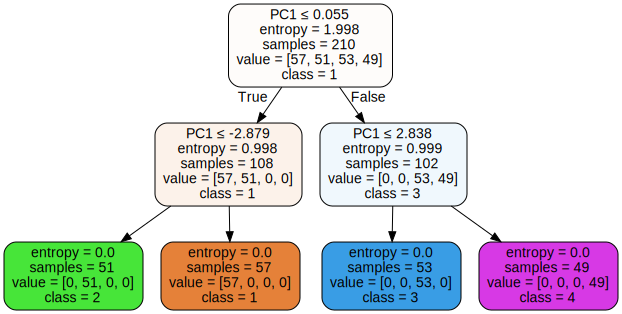

In [ ]:
#graph.render("iris") 
features=['PC1','PC2']
# features=['pH','DO','BOD','COD','Perm','SS','NH3','Nitrates','Chlorides','Fe','Mang','AB','CCL']
classes=['1','2','3','4']

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_c, y_ori, test_size = 0.3, random_state = 10) 
X_train, X_test, y_train, y_test = train_test_split(X_c, y_hc, test_size = 0.3, random_state = 10) 

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 25,max_features=2,max_depth=2) #PE Random_state = 25,  #PP Random_state = 0. #PET Random_state=25
classifier.fit(X_train, y_train)
# classifier.fit(X_c, y_kmeans)
#tree.plot_tree(classifier)

r=export_text(classifier,feature_names=features)
print(r)




import graphviz 
dot_data = tree.export_graphviz(classifier, out_file=None, 
                     feature_names=features,  
                      class_names=classes,  
                      filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

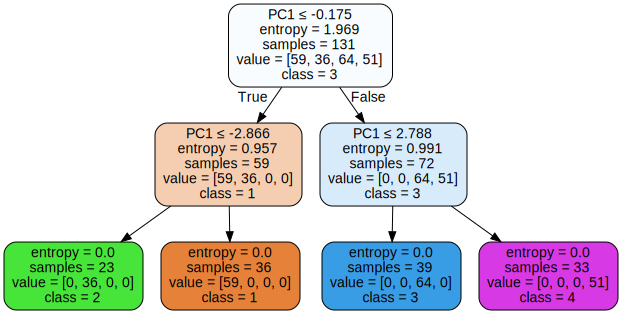

In [ ]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 25,max_features=2,max_depth=2)
classifier2.fit(X_train, y_train)
estimator=classifier2.estimators_[5]

dot_data2 = tree.export_graphviz(estimator, out_file=None, 
                     feature_names=features,  
                      class_names=classes,  
                      filled=True, rounded=True,  
                     special_characters=True)  
graph2 = graphviz.Source(dot_data2) 
graph2

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

y_pred2 = classifier2.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
print(accuracy_score(y_test, y_pred2))

target_names = classes
print(classification_report(y_test, y_pred, target_names=target_names))
print(classification_report(y_test, y_pred2, target_names=target_names))

[[26  0  0  0]
 [ 0 18  0  0]
 [ 0  0 24  0]
 [ 0  0  0 22]]
1.0
[[26  0  0  0]
 [ 0 18  0  0]
 [ 0  0 24  0]
 [ 0  0  0 22]]
1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        22

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        22

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



Index(['Temperature', 'pH', 'DO', 'Conductivity', 'Nitrite', 'Nitrate',
       'Phosphate', 'AN', 'BOD', 'COD', 'SS'],
      dtype='object')
[[-0.2290109  -0.27602173]
 [ 0.14286526 -0.43295531]
 [ 0.28934128 -0.16587877]
 [-0.20648472 -0.11450988]
 [ 0.24365309 -0.16422971]
 [-0.06688495 -0.30977043]
 [ 0.57482406 -0.15765088]
 [ 0.5112704   0.47918353]
 [-0.08448352 -0.113406  ]
 [ 0.13328331 -0.53307215]
 [ 0.3467373  -0.14596853]]


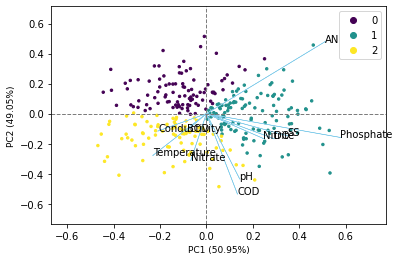

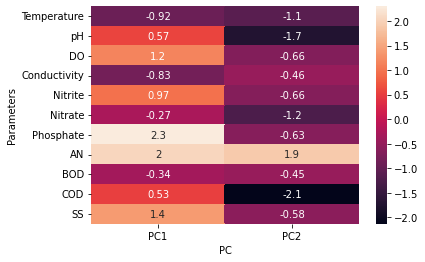

In [ ]:
from bioinfokit.visuz import cluster

# i=np.identity(dataset.shape[1])
# loadings=kpca.transform(i)
# print(loadings)
print(columns)
print(loadings)

cluster.biplot(cscore=X_c, loadings=loadings.T, labels=columns, var1=round(ev[0]*100, 2),
    var2=round(ev[1]*100, 2),colorlist=y_kmeans,show=True)

import seaborn as sns
# import matplotlib.pyplot as plt
x_axis_labels=['PC1','PC2']
# ,'PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
y_axis_labels=columns
ax = sns.heatmap(loadings*4, annot=True,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('PC')
plt.ylabel('Parameters')
plt.show()
